## Observations and Insights 

Observations

In [516]:
# Dependencies and Setup

import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
%matplotlib inline
from matplotlib.pyplot import figure


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mouse_study_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [517]:
# Checking the number of mice in combined data.
mouse_number = len(mouse_study_df["Mouse ID"].drop_duplicates())
mouse_number

249

In [518]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_id_timepoint = mouse_study_df[mouse_study_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_id_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [519]:
# Optional: Get all the data for the duplicate mouse ID. 
# getiing all the data for the duplicated timepoint and different Tumor volume
# this would eliminate the corrupted data for the specified mouse ID

data_duplicate_id = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
data_duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [520]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = pd.concat([mouse_study_df, data_duplicate_id]).drop_duplicates(keep=False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [521]:
# Checking the number of mice in the clean DataFrame.

mouse_clean_number = clean_df["Mouse ID"].nunique()
mouse_clean_number

248

## Summary Statistics

In [522]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# getting the mean of tumor volume for each drug regimen
mean_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# getting the median of tumor volume for each drug regimen
median_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# getting the variance of tumor volume for each drug regimen
var_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# getting the standard deviation of tumor volume for each drug regimen
std_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# getting the SEM of tumor volume for each drug regimen
sem_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [523]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# generating summary statistics data frame from the above determined values for each Drug Regimen
summary_stats = pd.DataFrame({"Mean": mean_regimen, "Median": median_regimen, "Variance": var_regimen, "Standard deviation": std_regimen, "SEM": sem_regimen})
summary_stats

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

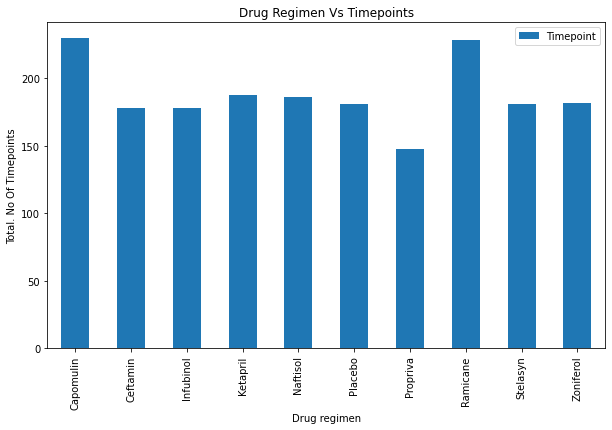

In [524]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# creating a data frame from clean data frame by grouping Drug Regimen and counting their time points
bar_df = clean_df.groupby("Drug Regimen")["Timepoint"].count()

# plotting bar plot by using Pandas
# bar plot for total number of timepoints vs each Drug Regimen
bar_plot = bar_df.plot(kind="bar", figsize=(10, 6));

# declaring the x-axis and y-axis for the bar plot 
plt.xlabel("Drug regimen")
plt.ylabel("Total. No Of Timepoints")

# setting the title & legend for the bar plot
plt.title("Drug Regimen Vs Timepoints")
plt.legend(loc="upper right")

# rotating ticks to vertical
plt.xticks(rotation=90);
bar_plot;



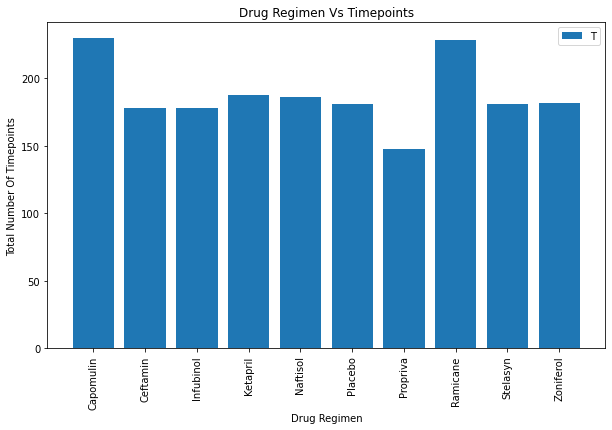

In [525]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# generating a bar plot by using pyplot
# setting the fig size of the bar plot
figure(figsize=(10, 6))

# creating the pyplot data frame by grouping Drug regimen and counting timepoints
pyplot_df = clean_df.groupby("Drug Regimen")["Timepoint"].count()

# setting the x-axis of the plot
x_axis = np.arange(len(pyplot_df))

# plotting bar plot by using pyplot
plt.bar(x_axis, pyplot_df)
plt.xticks(x_axis,pyplot_df.index)

# setting the title, labels, legend and ticks rotation of the bar plot.
plt.title("Drug Regimen Vs Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number Of Timepoints")
plt.legend("Timepoint", loc="upper right")
plt.xticks(rotation=90);

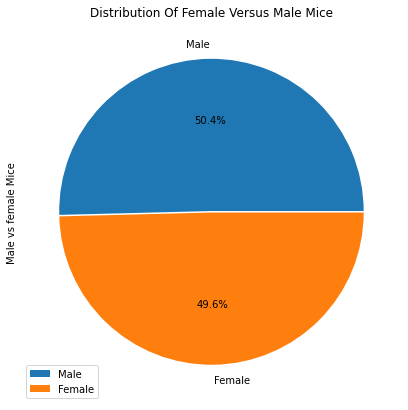

In [526]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# getting gender count by mouse ID and then counting their respective sex values
gender_count = clean_df.drop_duplicates(["Mouse ID"])["Sex"].value_counts()

# creating a gender dataframe for pie chart
gender_df = pd.DataFrame({"Gender" : gender_count.index, "Male vs female Mice": gender_count.values})

# setting Gender as dataframe index
gender_df = gender_df.set_index('Gender')
explode = (0.01, 0)

# plotting pie plot by using pandas
plot_pd = gender_df.plot.pie(y='Male vs female Mice', explode = explode, autopct="%1.1f%%", figsize=(7, 7))
plt.title("Distribution Of Female Versus Male Mice");

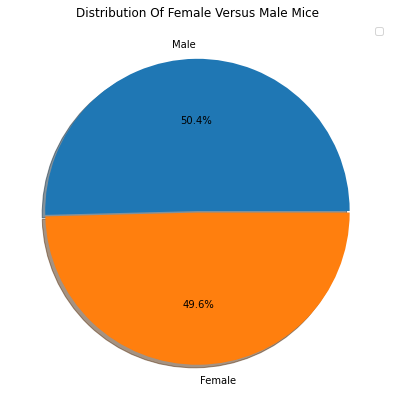

In [527]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# getting gender count by mouse ID and then counting their respective sex values 
gender_count = clean_df.drop_duplicates(["Mouse ID"])["Sex"].value_counts()

# resetting gender to column
gender_df.reset_index(inplace=True)

# setting figure size, labels and plot legend for pie plot
fig = plt.figure(figsize=(7,7))
labels = gender_count.index
plt.legend(gender_df["Gender"])
explode = (0.01, 0)

# generating pie plot by using pyplot and setting title of the pie plot
plt.pie(gender_count, explode=explode,labels=labels,autopct="%1.1f%%", shadow=True);
plt.title("Distribution Of Female Versus Male Mice");


## Quartiles, Outliers and Boxplots

In [528]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# getting tumor volume by grouping mouse ID and thn getting their max timepoint.
tumor_vol = clean_df.groupby("Mouse ID")["Timepoint"].max()

# merging clean_df and tumor_vol on right to retain the values in tumor_vol dataframe only
final_tumor_df = pd.merge(clean_df, tumor_vol, how='right', on=['Mouse ID','Timepoint'])

# generating tumor volume data with max time points and their respective values in tumor volume
final_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [529]:
# Put treatments into a list for for loop (and later for plot labels)

# makig dictionary of the four drug regimen for their respective tumor volume.
treatment_regimen = {"Capomulin": [], "Ramicane" : [], "Infubinol" : [], "Ceftamin" : []}

# setting for loop to get the values of the tumor volume for the four drugs
for index, row in final_tumor_df.iterrows() :

    if row["Drug Regimen"] == "Capomulin":
        treatment_regimen["Capomulin"].append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ramicane":
        treatment_regimen["Ramicane"].append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Infubinol":
        treatment_regimen["Infubinol"].append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ceftamin":
        treatment_regimen["Ceftamin"].append(row["Tumor Volume (mm3)"])   
        
# extracting values from dictionary for the following        
Capomulin = treatment_regimen["Capomulin"]    
Ramicane = treatment_regimen["Ramicane"]
Infubinol = treatment_regimen["Infubinol"]
Ceftamin = treatment_regimen["Ceftamin"]

In [530]:
# calculating quartiles and IQR for the drug regimen Capomulin
# sorting the values of tumor volume
sort_capomulin = np.sort(Capomulin)
Q1_capomulin = np.percentile(Capomulin, 25, interpolation = 'midpoint')
Q2_capomulin = np.percentile(Capomulin, 50, interpolation = 'midpoint')
Q3_capomulin = np.percentile(Capomulin, 75, interpolation = 'midpoint')

# calculating IQR for Capomulin
IQR_capomulin = Q3_capomulin - Q1_capomulin

# calculating lower limit and upper limit
low_lim_capomulin = Q1_capomulin - 1.5 * IQR_capomulin
up_lim_capomulin = Q3_capomulin + 1.5 * IQR_capomulin


# finding if there is any outlier
outlier_capomulin =[]
for x in Capomulin:
    if ((x> up_lim_capomulin) or (x<low_lim_capomulin)):
         outlier.append(x)
outlier_capomulin

[]

In [531]:
# calculating quartiles and IQR for the drug regimen Ramicane
# sorting the values of tumor volume
sort_ramicane = np.sort(Ramicane)
Q1_ramicane = np.percentile(Ramicane, 25, interpolation = 'midpoint')
Q2_ramicane = np.percentile(Ramicane, 50, interpolation = 'midpoint')
Q3_ramicane = np.percentile(Ramicane, 75, interpolation = 'midpoint')

# calculating IQR for Ramicane
IQR_ramicane = Q3_ramicane - Q1_ramicane

# calculating lower limit and upper limit
low_lim_ramicane = Q1_ramicane - 1.5 * IQR_ramicane
up_lim_ramicane = Q3_ramicane + 1.5 * IQR_ramicane

# finding if there is any outlier
outlier_ramicane =[]
for x in Ramicane:
    if ((x> up_lim_ramicane) or (x<low_lim_ramicane)):
         outlier.append(x)
outlier_ramicane

[]

In [532]:
# calculating quartiles and IQR for the drug regimen Infubinol
# sorting the values of tumor volume
sort_infubinol = np.sort(Infubinol)
Q1_infubinol = np.percentile(Infubinol, 25, interpolation = 'midpoint')
Q2_infubinol = np.percentile(Infubinol, 50, interpolation = 'midpoint')
Q3_infubinol = np.percentile(Infubinol, 75, interpolation = 'midpoint')

# calculating IQR for Infubinol
IQR_infubinol = Q3_infubinol - Q1_infubinol

# calculating lower limit and upper limit
low_lim_infubinol = Q1_infubinol - 1.5 * IQR_infubinol
up_lim_infubinol = Q3_infubinol + 1.5 * IQR_infubinol

# finding if there is any outlier
outlier_infubinol =[]
for x in Infubinol:
    if ((x> up_lim_infubinol) or (x<low_lim_infubinol)):
         outlier.append(x)
outlier_infubinol

[]

In [533]:
# calculating quartiles and IQR for the drug regimen Ceftamin
# sorting the values of tumor volume
sort_ceftamin = np.sort(Ceftamin)
Q1_ceftamin = np.percentile(Ceftamin, 25, interpolation = 'midpoint')
Q2_ceftamin = np.percentile(Ceftamin, 50, interpolation = 'midpoint')
Q3_ceftamin = np.percentile(Ceftamin, 75, interpolation = 'midpoint')

# calculating IQR for Ceftamin
IQR_ceftamin = Q3_ceftamin - Q1_ceftamin
IQR_ceftamin

# calculating lower limit and upper limit
low_lim_ceftamin = Q1_ceftamin - 1.5 * IQR_ceftamin
up_lim_ceftamin = Q3_ceftamin + 1.5 * IQR_ceftamin

# finding if there is any outlier
outlier_ceftamin =[]
for x in Ceftamin:
    if ((x> up_lim_ceftamin) or (x<low_lim_ceftamin)):
         outlier.append(x)
outlier_ceftamin

[]

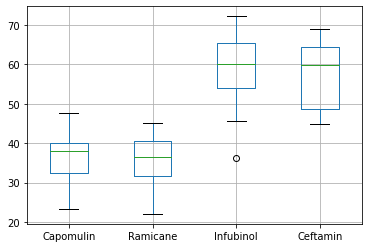

In [534]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# creating dataframe for box plot from the above created dictionary
box_plot = pd.DataFrame(data=treatment_regimen)

# generating box plot for the four drug regimen of of their final tumor volume
boxplot = box_plot.boxplot(column=['Capomulin','Ramicane','Infubinol','Ceftamin']);
boxplot;

## Line and Scatter Plots

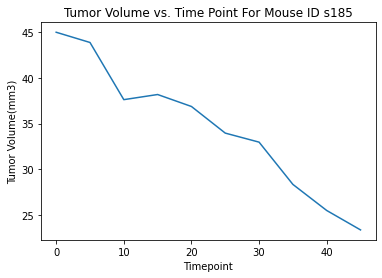

In [535]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# selecting mouseID s185 for generting line plot of tumor volume vs time point for Capomulin
# creating a dataframe for mouse ID s185 where drug regimen is Capomulin and mouseID is s185
treatment_capomulin_s185 = clean_df[(clean_df["Drug Regimen"]== "Capomulin") & (clean_df["Mouse ID"]== "s185")]

# sorting values of the dataframe by timepoint and tumor volume
treatment_capomulin_s185.sort_values(by=["Timepoint", "Tumor Volume (mm3)"])

# setting x-axis as timepoints for the line plot 
x_axis_data = treatment_capomulin_s185[["Timepoint"]]

# setting y-axis as tumor volume as points
points = treatment_capomulin_s185[["Tumor Volume (mm3)"]]

# setting title and labels for both axis
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Tumor Volume vs. Time Point For Mouse ID s185")

# generating line plot
plt.plot(x_axis_data, points)
plt.show()

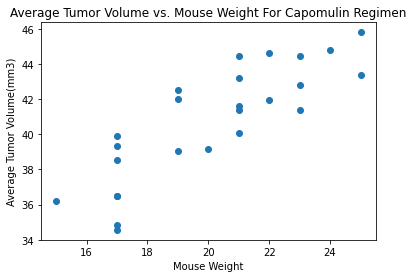

In [536]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# generating a dataframe for drug regimen Capomulin and all of its data
treatment_capomulin = clean_df[clean_df["Drug Regimen"]== "Capomulin"]

# calculating average tumor volume and weight, grouping by mouse ID 
avg_tumor_capomulin = treatment_capomulin.groupby(["Mouse ID"])[["Weight (g)" , "Tumor Volume (mm3)"]].mean()

# generating scatter plot
plt.scatter(avg_tumor_capomulin.iloc[:,0],avg_tumor_capomulin.iloc[:,1])

# setting x-label, y-label and plot title 
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume(mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight For Capomulin Regimen")
plt.show()

## Correlation and Regression

In [537]:
# Calculate the correlation coefficient and linear regression model 

# getting mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_tumor_capomulin.iloc[:,0]
avg_tumor = avg_tumor_capomulin.iloc[:,1]

# getting correlation for mouse weight and average tumor volume
correlation = st.pearsonr(mouse_weight,avg_tumor)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


In [538]:
# linear regression of mouse weight on average tumor volume
x_values = avg_tumor_capomulin['Weight (g)']
y_values = avg_tumor_capomulin['Tumor Volume (mm3)']

# running linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# print(slope, intercept, rvalue, pvalue, stderr)
print("The outcome of linear regression:", "\n", "Slope:", slope, "\n", "intercept:", intercept , "\n", 
      "rvalue:", rvalue, "\n", "pvalue:", pvalue, "\n", "stderr:", stderr)


The outcome of linear regression: 
 Slope: 0.9544396890241047 
 intercept: 21.55216053268501 
 rvalue: 0.841936342469472 
 pvalue: 1.3225722434712478e-07 
 stderr: 0.1275435903320133


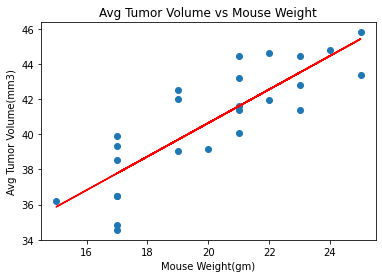

In [541]:
# gettig regress values
regress_values = x_values * slope + intercept

# getting equation for linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# generating scatter plot 
plt.scatter(x_values,y_values)

# plotting linear regression model on scatter plot
plt.plot(x_values,regress_values,"r-")

# setting labels and title for the plot
plt.title("Avg Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight(gm)")
plt.ylabel("Avg Tumor Volume(mm3)")
plt.show()